# Importing the libraries

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscs
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# Warning
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Data Preparation

In [4]:
train_df = train_df.drop('Id', axis=1)

In [5]:
train_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Exploratory Data Analysis

Data Shape

In [6]:
train_df.shape

(1460, 80)

Checking for Duplicates

In [7]:
train_df.drop_duplicates(inplace=True)

Checking data types

In [8]:
train_df.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

Data info

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Numerical Features

In [10]:
numerical_features=list(train_df.select_dtypes(include=['float64','int64']).columns)
print(numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Categorical Features

In [11]:
categorical_features=list((train_df.select_dtypes(exclude=['float64','int64']).columns))
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Checking for missing values

In [12]:
train_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Statistics of our dataset

In [13]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Correlation Matrix

In [14]:
# Select only the numeric columns from the DataFrame
numeric_df = train_df.select_dtypes(include=[float, int])

# Correlation matrix
numeric_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


# Data Cleaning

Data Redundancy

columns

In [15]:
duplicated_columns = train_df.columns[train_df.columns.duplicated()]
if len(duplicated_columns) > 0:
    print("Duplicated columns:", duplicated_columns)
else:
    print("No duplicated columns found.")

No duplicated columns found.


rows

In [16]:
duplicated_rows = train_df[train_df.duplicated()]
if not duplicated_rows.empty:
    print("Duplicated rows:")
    print(duplicated_rows)
else:
    print("No duplicated rows found.")

No duplicated rows found.


Missing Values

<Axes: >

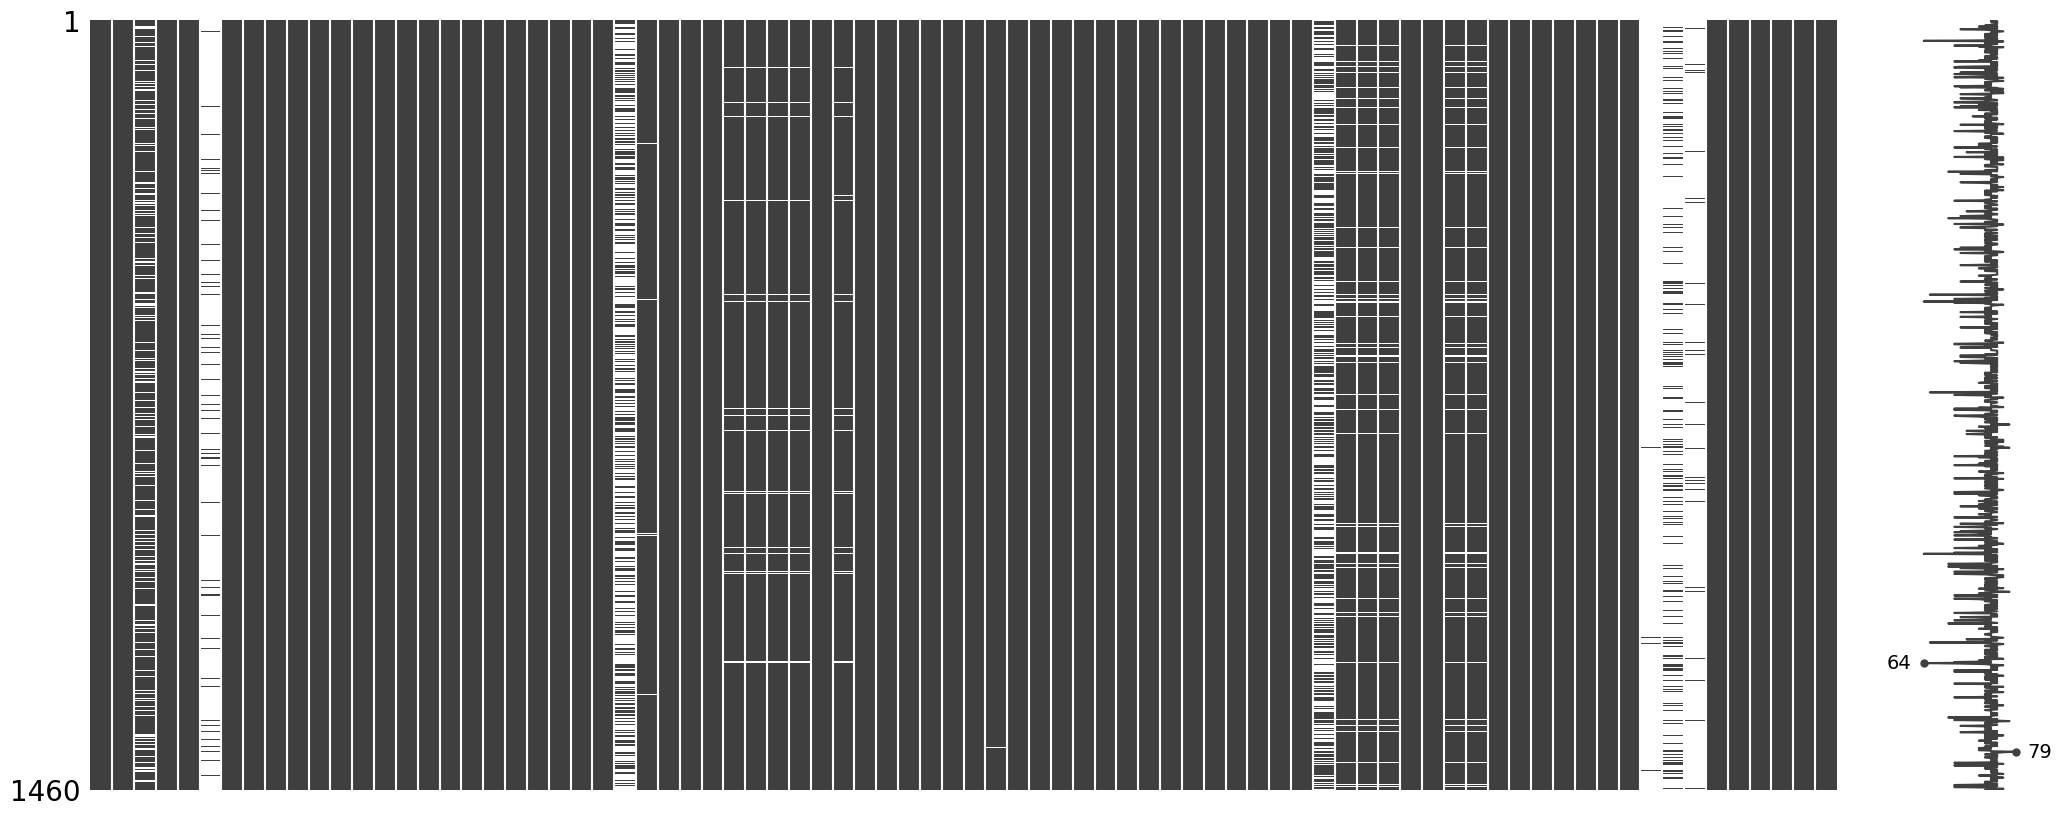

In [17]:
msno.matrix(train_df)

Mean for missing numerical features

In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
null_numerical_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
imputer.fit(train_df[null_numerical_columns])
train_df[null_numerical_columns] = imputer.transform(train_df[null_numerical_columns])

Most frequent for missing categorical features

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
null_catagorical_columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
imputer.fit(train_df[null_catagorical_columns])
train_df[null_catagorical_columns] = imputer.transform(train_df[null_catagorical_columns])

In [20]:
train_df.isnull().sum().sum()

0

One Hot Encoder

In [21]:
# Encode the selected columns
dummies = pd.get_dummies(train_df[categorical_features], drop_first=True)

# Concatenate the encoded columns with the original dataset
train_df = pd.concat([train_df, dummies], axis=1)

# Drop the original columns that have been encoded
train_df.drop(categorical_features, axis=1, inplace=True)

# Output the modified dataset
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


# Plotting relationship between variables

SalePrice's Density

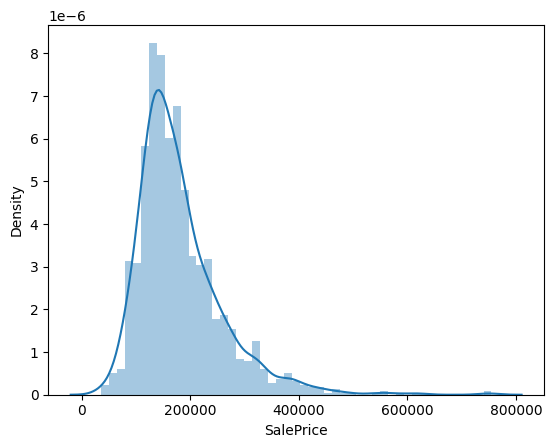

In [22]:
sns.distplot(train_df['SalePrice']);

SalePrice vs OverallQual

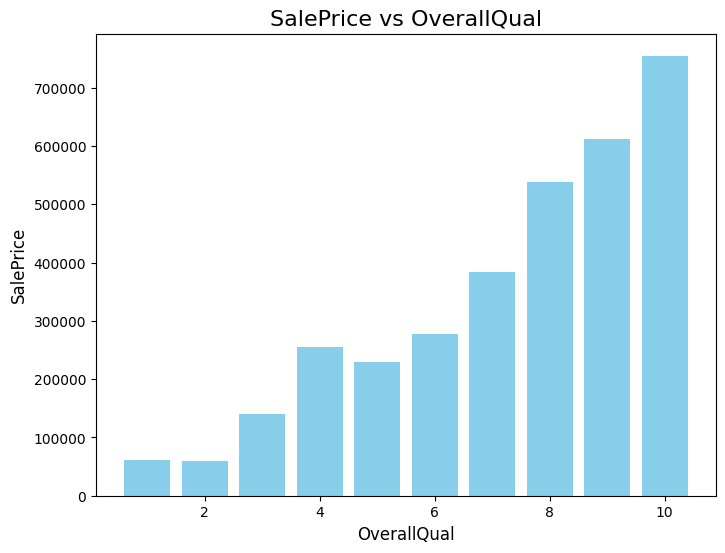

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(train_df['OverallQual'], train_df['SalePrice'], color='skyblue')  # Create the bar plot
plt.xlabel('OverallQual', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title('SalePrice vs OverallQual', fontsize=16) 


plt.show()

SalePrice vs YearBuilt

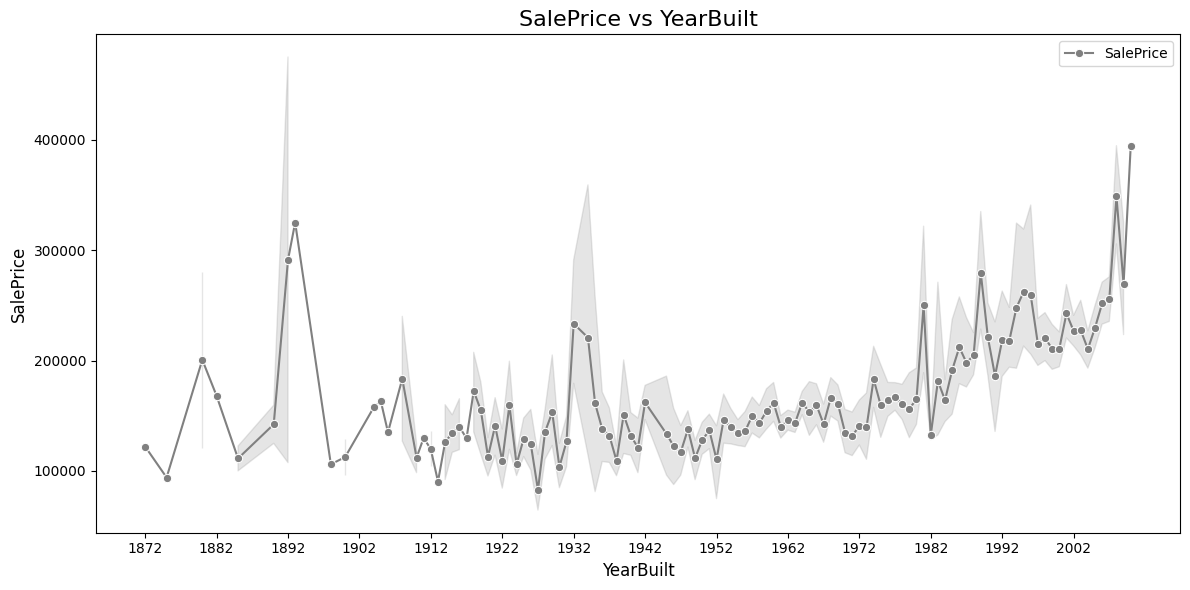

In [24]:
plt.figure(figsize=(12, 6))  

sns.lineplot(x="YearBuilt", y="SalePrice", data=train_df, label='SalePrice', marker='o', color='grey')

plt.title("SalePrice vs YearBuilt", fontsize=16)
plt.xlabel("YearBuilt", fontsize=12)
plt.ylabel("SalePrice", fontsize=12)

# Customize the x-axis ticks to show more years
plt.xticks(range(min(train_df['YearBuilt']), max(train_df['YearBuilt']) + 1, 10))  # Adjust the interval (e.g., 10 years)

plt.legend()
plt.tight_layout()
plt.show()

SalePrice vs GarageCars

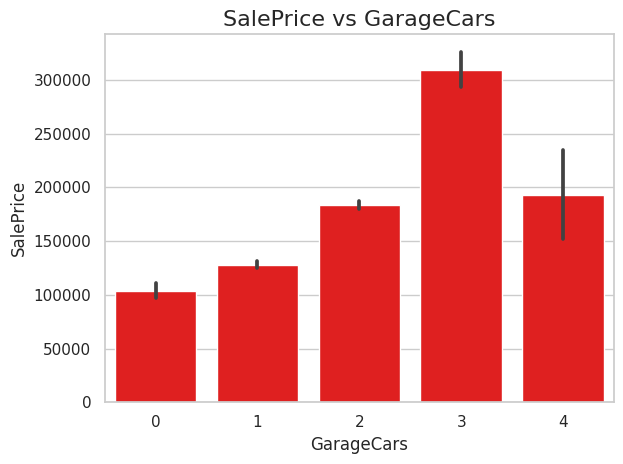

In [25]:
sns.set(style="whitegrid")
ax = sns.barplot(x="GarageCars", y="SalePrice", data=train_df, color='red')
plt.title("SalePrice vs GarageCars", fontsize=16)
ax.set_xlabel("GarageCars", fontsize=12)
ax.set_ylabel("SalePrice", fontsize=12)
plt.tight_layout()
plt.show()

# Machine Learning

Pre-processing Steps for Machine Learning


In [26]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

Spliting the Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model Selection

In [29]:
# Initialize models
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Polynomial Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

# Define parameters for polynomial regression
poly_degree = 2  # Change the degree as needed

# Create a dictionary to store the cross-validation scores for each model
cv_scores = {}

for model_name, model in models.items():
    if model_name == "Polynomial Regression":
        poly_features = PolynomialFeatures(degree=poly_degree)
        X_train_poly = poly_features.fit_transform(X_train)
        scores = cross_val_score(model, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=5)
    else:
        scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    
    mse_scores = -scores  # Convert negative MSE scores to positive
    cv_scores[model_name] = mse_scores.mean()

# Find the best model based on the lowest MSE
best_model_name = min(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]

# Train the best model on the full training dataset
if best_model_name == "Polynomial Regression":
    poly_features = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly_features.fit_transform(X_train)
    best_model.fit(X_train_poly, y_train)
else:
    best_model.fit(X_train, y_train)

# Evaluate the best model on the test dataset
if best_model_name == "Polynomial Regression":
    X_test_poly = poly_features.transform(X_test)
    y_pred = best_model.predict(X_test_poly)
else:
    y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error on the test dataset
mse = mean_squared_error(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Mean Squared Error on Test Data: {mse}")

Best Model: Random Forest Regression
Mean Squared Error on Test Data: 875985821.6023638


Correlation

In [30]:
# Create a dictionary to store the cross-validation scores and test MSE for each model
results = {
    "Model": [],
    "Cross-Validation MSE": [],
    "Test MSE": []
}

for model_name, model in models.items():
    # Cross-validation
    if model_name == "Polynomial Regression":
        poly_features = PolynomialFeatures(degree=poly_degree)
        X_train_poly = poly_features.fit_transform(X_train)
        scores = cross_val_score(model, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=5)
    else:
        scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    
    mse_scores = -scores  # Convert negative MSE scores to positive
    cv_mse_mean = mse_scores.mean()
    
    # Train and evaluate on the test data
    if model_name == "Polynomial Regression":
        poly_features = PolynomialFeatures(degree=poly_degree)
        X_train_poly = poly_features.fit_transform(X_train)
        model.fit(X_train_poly, y_train)
        X_test_poly = poly_features.transform(X_test)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    test_mse = mean_squared_error(y_test, y_pred)
    
    # Store the results in the dictionary
    results["Model"].append(model_name)
    results["Cross-Validation MSE"].append(cv_mse_mean)
    results["Test MSE"].append(test_mse)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)

                        Model  Cross-Validation MSE      Test MSE
0  Multiple Linear Regression          1.492096e+34  4.596257e+24
1       Polynomial Regression          2.821823e+09  1.251158e+09
2   Support Vector Regression          6.242792e+09  7.858365e+09
3    Decision Tree Regression          2.002554e+09  1.626090e+09
4    Random Forest Regression          9.787094e+08  8.697355e+08


Training Random Forest Regresssion

In [31]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Predicting the Test set results

In [32]:
y_pred = regressor.predict(X_test)

Visualising the Random Forest Regression

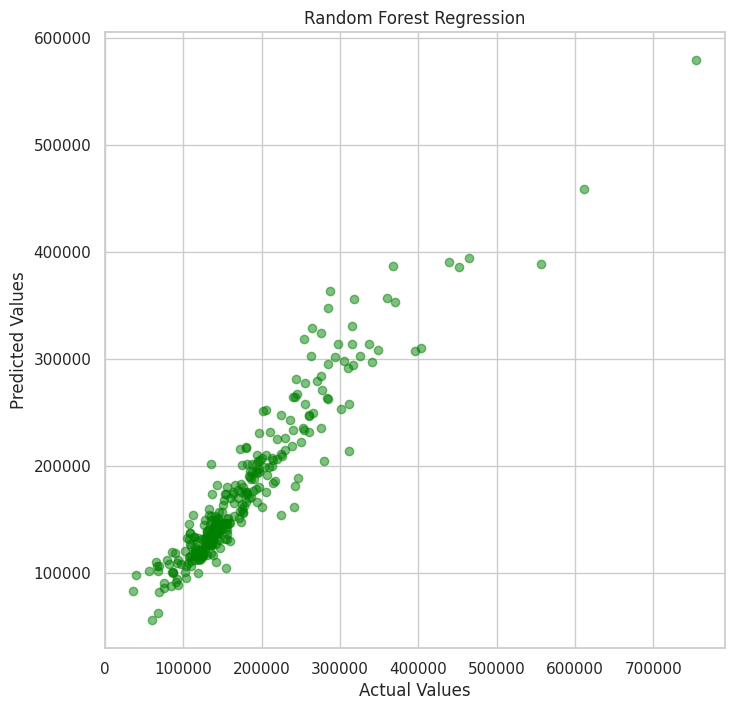

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color = 'green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression")
plt.grid(True)
plt.show()

Evaluating the model performance

In [34]:
r2_score(y_test, y_pred)

0.8809131347635598